# Solución del oscilador amortiguado y péndulo simple

In [1]:
function metodo_RK4(f,x0,ti,tf,n)
    #Buscamos h
    h=(tf-ti)/n
    #Hacemos el primer intervalo
    listt=linspace(ti,tf,n+1)
    listx=[]
    #Tomamos el primer valor de x0 en la lista solución
    push!(listx,x0)
    x=x0
    #Método de Runge-kutta orden 4
    for i in 1:length(listt)-1
        k1=f(x,listt[i])
        k2=f(x+(h/2)*k1,listt[i]+(h/2))
        k3=f(x+(h/2)*k2,listt[i]+(h/2))
        k4=f(x+h*k3,listt[i+1])
        y=x+(h/6)*(k1+2*k2+2*k3+k4)
        #Se incerta en la lista
        push!(listx,y)
        #Se puede omitir
        x=y
    end
    return listt,listx
end

function metodo_RK4h(f,xi,ti,tf,h)
    #Calculo de n dado h
    n=Int(round((tf-ti)/h))
    return metodo_RK4(f,xi,ti,tf,n)
end

#Método de Euler USUAL (COPY PASTE)
#n es el número de intervalos que tendrá la partición
function metodo_euler(f,x0,ti,tf,n)
    #El comando linespace genera subintervalos con n+1 elEentos
    listt=linspace(ti,tf,n+1)
    #Con una distancia h, y para cada tk se cumple tk=t0+mh con m de 0 a n
    h=(tf-ti)/n
    listx=[]
    x=x0
    #Se pone la condición inicial para ti
    push!(listx,x)
    #La serie de recurrencia para nuestro intervalo
    for i in 2:(n+1)
        #x es el elEento inmediato inferior y y el superior
        y=x+h*f(x,listt[i])
        push!(listx,y)
        #Aquí se pasa al siguiente dato
        x=y
    end
    return listt, listx
end


#Se crea la misma función pero evaluando en h
function metodo_eulerh(f,x0,ti,tf,h)
    n=Int(round((tf-ti)/h))
    return metodo_euler(f,x0,ti,tf,n)
end

metodo_eulerh (generic function with 1 method)

____________
__Ejercicio 1:__ Resolver oscilador amortiguado:
$$m \ddot x=-k x -b \dot x,$$
usando $m=k=b=1$ y $x_0=1$, $\dot x_0=0$.
Usen Euler Y Runge-Kutta orden 4, comparen las soluciones, es decir, grafiquen el espacio de fase para cada método y despues juntos.   
__Nota:__ El método de Runge-Kutta esta dentro de la familia de métodos simplécticos, es decir, preserva el volumen en el espacio de fase, algo particularmente útil cuanto tenemos sistemas que conservan la energia, a diferencia de _Euler_ que no lo hace. Observen que al no haber cantidades conservadas para el oscilador amortiguado, Euler funcione mucho mejor que en el otro caso, pues el oscilador amortiguado no conserva el volumen del espacio de fase.

Si hacemos lo que hicimos en el ejercicio pasado.
$\dot{x}=u \rightarrow \dot{u}=\ddot{x}$. Además por la condición  $m=k=b=1$. Tenemos que:
$\ddot{x}=-x-\dot{x}$. Así:
$$
\left.
\dot{x}=u \atop
\dot{u} = -x -u
\right\} \rightarrow
\left( \begin{array}{c} \dot{x}\\ \dot{u}\\ \end{array} \right) = \left( \begin{array}{c} u\\ -x-u\\ \end{array}
\right)
\rightarrow
\frac{d\bar{x}}{dt}=F(x,u) = \left( \begin{array}{c} u\\ -x-u\\ \end{array}
\right) = 
\left( \begin{array}{c} x[2]\\ -x[1]-x[2]\\ \end{array}
\right) 
$$

In [2]:
F(x,t)=[x[2],-x[1]-x[2]]
X0=[1,0]
ti=0
tf=50;

Datos:

In [3]:
Dato1_E=metodo_eulerh(F,X0,ti,tf,.05);

In [4]:
Dato1_RK=metodo_RK4h(F,X0,ti,tf,.05);

Movimiento:

In [5]:
plot(Dato1_E[1],map(x->x[1],Dato1_E[2]), label="Método E")
plot(Dato1_RK[1],map(x->x[1],Dato1_RK[2]),label="Método RK")
title("Movimiento del sistema en x vs t")
legend()
grid("on")
show()

LoadError: [91mUndefVarError: plot not defined[39m

Diagramas fase:

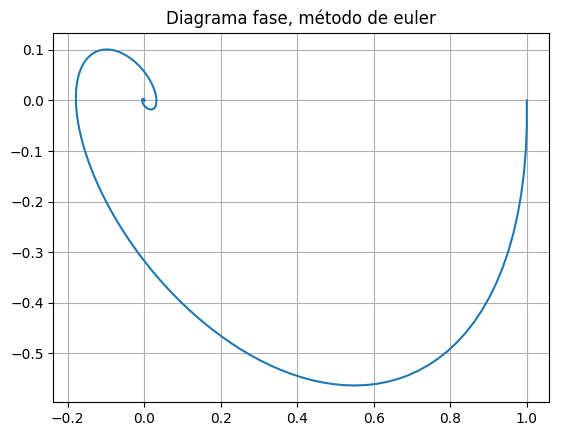

In [6]:
using PyPlot
plot(map(x->x[1],Dato1_E[2]),map(x->x[2],Dato1_E[2]))
title("Diagrama fase, método de euler")
grid("on")
show()

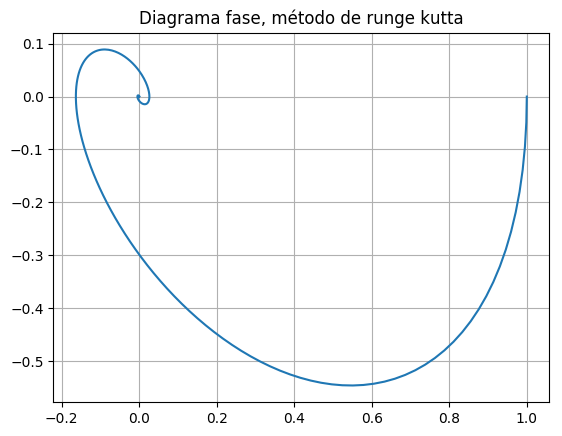

In [7]:
using PyPlot
plot(map(x->x[1],Dato1_RK[2]),map(x->x[2],Dato1_RK[2]))
title("Diagrama fase, método de runge kutta")
grid("on")
show()

Comparación

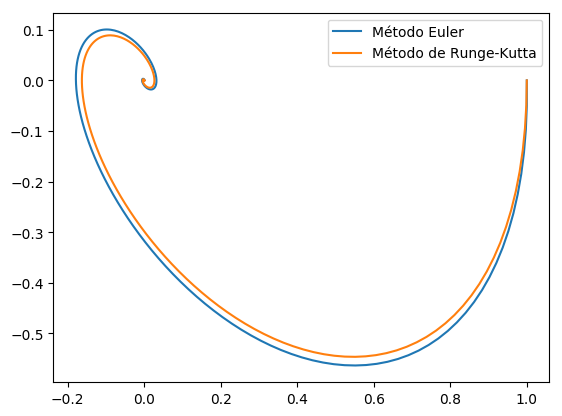

In [8]:
plot(map(x->x[1],Dato1_E[2]),map(x->x[2],Dato1_E[2]) , label="Método Euler")
plot(map(x->x[1],Dato1_RK[2]),map(x->x[2],Dato1_RK[2]), label="Método de Runge-Kutta")
legend()
show()

Como vemos, los valores son cercanos aún cuando la h es grande

----------
__Ejercicio 2:__ Resolver el péndulo simple:
$$l \ddot\theta=-g \sin(\theta),$$
usando Runge-Kutta orden 4. Gráficar muchas condiciones iniciales en el espacio de fase usando $l=g=1$. Ajuste el rango de la gráfica para que se centre cerca del cero para que se puedan observar los dos tipos de movimiento presentes. Coménte e interprete las soluciones.

Usando que $l=g=1$. Se tiene que $\ddot\theta=-\sin(\theta),$ Volviendo a hacer a alguna variable $\varphi$ la velocidad de $\theta$, entonces $\dot\theta=\varphi$.   
Así: $$\left.
\dot{\theta}=\varphi \atop
\dot{\varphi} = -\sin{\theta}
\right\} \rightarrow
\frac{d\bar{\theta}}{dt}=F(\theta,\varphi) = \left( \begin{array}{c} \varphi\\ -\sin{\theta}\\ \end{array}
\right) = 
\left( \begin{array}{c} x[2]\\ -\sin{(x[1])}\\ \end{array}
\right) 
$$


In [9]:
Θ(θ,t)=[θ[2],-sin(θ[1])]
ti=0
tf=6*pi
n=2500;

__Diagrama Fase:__

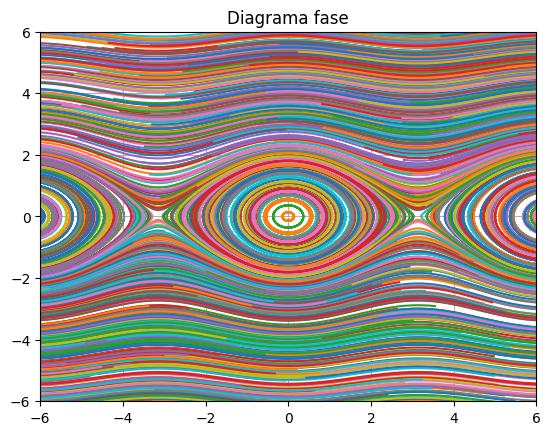

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [10]:
using PyPlot
for i in 1:n
    Θ_0=(rand(2)-rand(2))*20
    Dato2_RK_i=metodo_RK4h(Θ,Θ_0,ti,tf,.001)
    plot(map(θ->θ[1],Dato2_RK_i[2]),map(θ->θ[2],Dato2_RK_i[2]))
end
gca()[:set_xlim]((-6,6))
gca()[:set_ylim]((-6,6))
title("Diagrama fase")
legend()
grid("on")
show()

Este diagrama fase muestra el comportamiento de $\theta$, es así como interpretamos que existen dos tipos de movimientos, el oscilatorio que es la parte que se encuentra en forma de elipse en el diagrama fase; mientras que el segundo movimiento se explica ya que como $\theta$ está definido en un circulo, el hecho de que varie su dominio hacia infinito se interpreta como si fuese una rotación y esta es la parte "libre" del diagrama.

Se observa que existen puntos donde el sistema permanece quieto y esto sucede si la energía es 0, además existe un límite entre los dos movimientos descritos anteriormente, dicha zona es una región inestable del sistema, ya que ante cualquier perturbación su movimiento será descrito ya sea por rotaciones u oscilaciones.

*****
```python
F F M G
```